In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set(style="ticks")

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
data.shape

(5000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [10]:
# sea.pairplot(data.iloc[:,1:])

In [11]:
# data[data['Experience'] < 0]['Experience'].count()

In [12]:
# dfExp = data.loc[data['Experience'] >0]
# negExp = data.Experience < 0
# column_name = 'Experience'
# mylist = data.loc[negExp]['ID'].tolist()

In [13]:
# negExp.value_counts()

In [14]:
# for id in mylist:
#     age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
#     education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
#     df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
#     exp = df_filtered['Experience'].median()
#     data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [15]:
# data[data['Experience'] < 0]['Experience'].count()

In [16]:
# data.describe().transpose()

In [17]:
def is_mortgage(row):
    if row['Mortgage']>0:
        return 1
    else:
        return 0

In [18]:
data['IsMortgage']=data.apply (lambda row: is_mortgage(row),axis=1)
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,IsMortgage
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0


In [19]:
mortgage_counts=data['IsMortgage'].value_counts(normalize=False).to_frame()
mortgage_counts

,IsMortgage
0,3462
1,1538


In [20]:
def is_credit(row):
    if row['CCAvg']>0:
        return 1
    else:
        return 0

In [21]:
data['IsCredit']=data.apply (lambda row: is_credit(row),axis=1)
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,IsMortgage,IsCredit
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,1


In [22]:
credit_counts=data['IsCredit'].value_counts(normalize=False).to_frame()
credit_counts

,IsCredit
1,4894
0,106


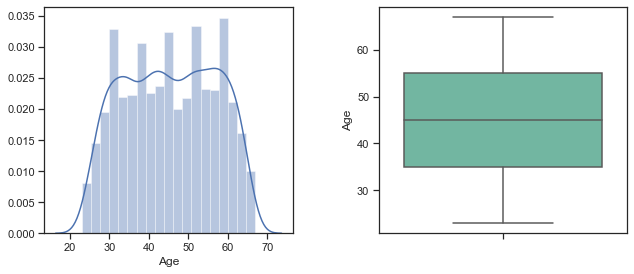

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Age"], ax=axes[0]);
sea.boxplot(data["Age"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

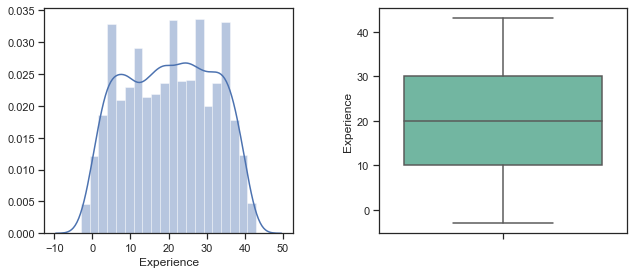

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Experience"], ax=axes[0]);
sea.boxplot(data["Experience"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

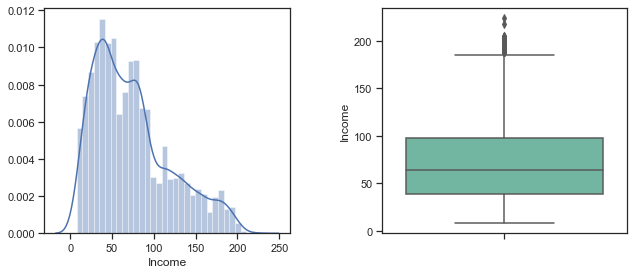

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Income"], ax=axes[0]);
sea.boxplot(data["Income"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

Distribution of Income feature is highly skewed. A closer look reveals that it has log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. In scikit-learn, PowerTransformer can be used with methods Box-Cox and Yeo-Johnson. This time we use Yeo-Johnson.

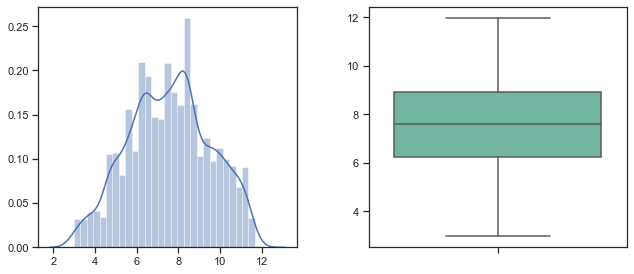

In [27]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data["Income"].values.reshape(-1, 1))

temp = pt.transform(data["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sea.distplot(temp, ax=axes[0]);
sea.boxplot(temp, orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

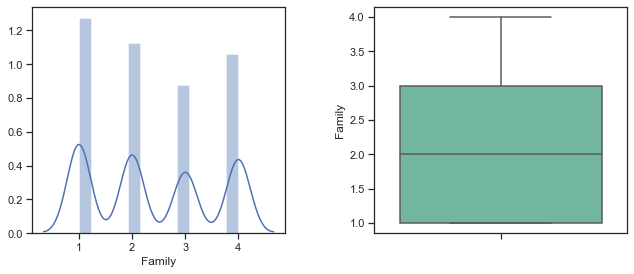

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Family"], ax=axes[0]);
sea.boxplot(data["Family"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

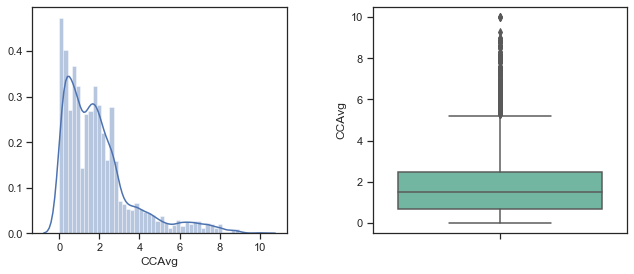

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["CCAvg"], ax=axes[0]);
sea.boxplot(data["CCAvg"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

CCAvg is also log-normal. We analyze its transformed version below.

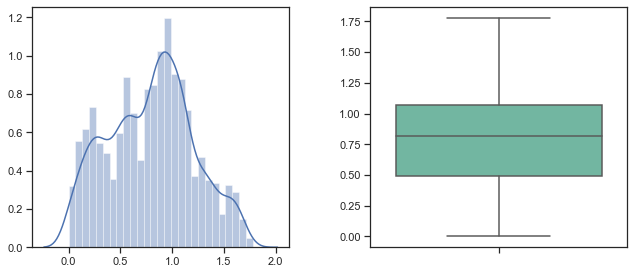

In [30]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data["CCAvg"].values.reshape(-1, 1))

temp = pt.transform(data["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sea.distplot(temp, ax=axes[0]);
sea.boxplot(temp, orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

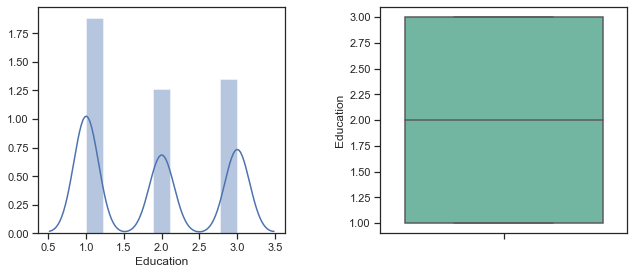

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Education"], ax=axes[0]);
sea.boxplot(data["Education"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

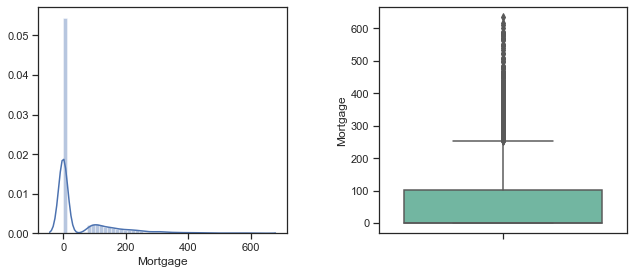

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sea.distplot(data["Mortgage"], ax=axes[0]);
sea.boxplot(data["Mortgage"], orient="v", palette="Set2", ax=axes[1])

fig.tight_layout(pad=5.0)

A lot of customers doesn't have mortgage and the right side of the distribution is almost flat. We can construct an ordinal categorical feature Mortgage_Int using Mortgage feature.

In [35]:
data["Mortgage_Int"] = pd.cut(data["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

# data.drop("Mortgage", axis=1, inplace=True)

In [36]:
data["SecuritiesAccount"].nunique()

2

In [37]:
data["CDAccount"].nunique()

2

In [38]:
data["Online"].nunique()

2

In [39]:
data["CreditCard"].nunique()

2

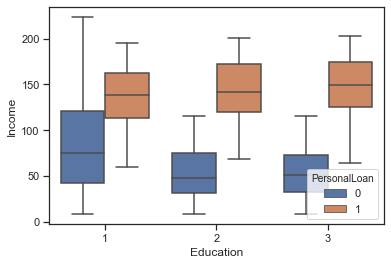

In [97]:
sea.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

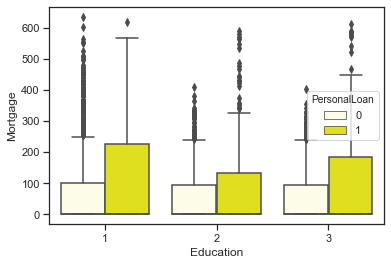

In [98]:
sea.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')

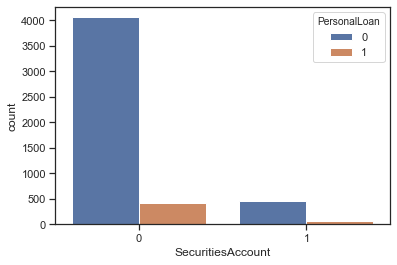

In [99]:
sea.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

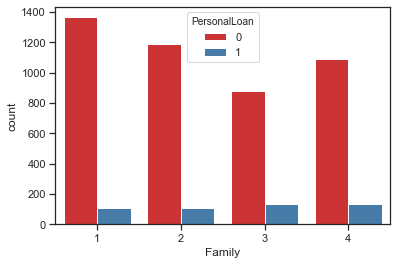

In [100]:
sea.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

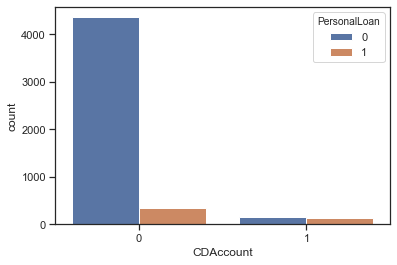

In [101]:
sea.countplot(x='CDAccount',data=data,hue='PersonalLoan')

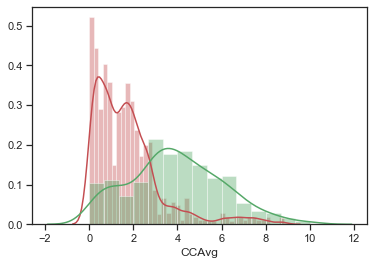

In [102]:
sea.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sea.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')

In [103]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0, 0.5, 'Age')

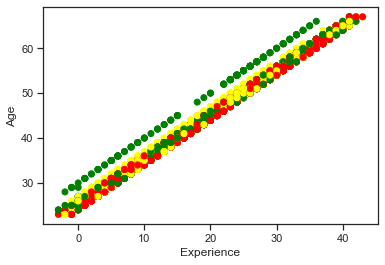

In [104]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

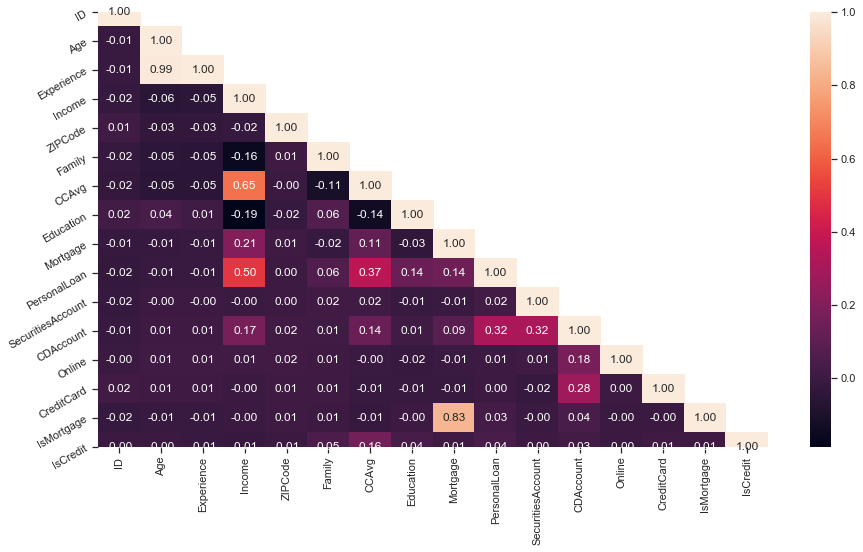

In [108]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,8))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

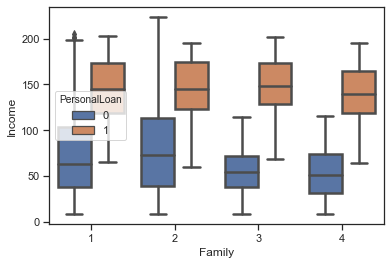

In [109]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)

In [41]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [42]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,IsMortgage,IsCredit,Mortgage_Int
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,1,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,1,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,1,0


In [43]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

In [44]:
from sklearn.linear_model import LogisticRegression

LogRegModel = LogisticRegression()
LogRegModel.fit(train_set,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
LogRegModel.score(test_set , test_labels)

0.9

In [46]:
y_predict = LogRegModel.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [47]:
test_labels.head(5)

789     0
2507    0
2376    0
1378    0
598     0
Name: PersonalLoan, dtype: int64

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [50]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [51]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
randomforest_model.score(test_set,test_labels)

0.9

In [53]:
y_predict = randomforest_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [54]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
naive_model.score(test_set,test_labels)

0.878

So, it seems like Decision Tree algorithm has the highest accuracy and we can choose that as our final model